# Reconstruction Evaluation Demo 

Demo on how to evaluate your 3D reconstruction method by comparing your reconstructed meshes against the ground truth meshes of the benchmark datasets: 
 - 3dMDLab-real
 - 3dMDLab-synthetic
 - 4DMaya-real
 - 4DMaya-synthetic

#### Prerequisites

 1. Download the datasets from [iBug website](https://ibug.doc.ic.ac.uk/resources/itwmm/).

 2. Generate and save your reconstructions in the same format as the reconstructions provided in the datasets. The provided reconstructions in the folder `Reconstructions_dummy` of each dataset are just dummy .obj files which all contain the same mesh and exist just to make clear what is the desired format to be used.
 
#### Note

In case you use the Surrey model for your reconstructions, you might need to define a tighter area of the meshes for error calculation.This will produce better compatibility between your reconstructions and the ground trouth data. To do that you must change the distance parameter of the method `landmark_and_mask_gt_mesh()` in the file `benchmark.py`, from 1 to a smaller number (e.g. 0.6).

In [1]:
from benchmark import *
%matplotlib inline

# Replace DATA_PATH with the path to your data. It should have subdirectories:
#  3dMDLab_real/
#  3dMDLab_synthetic/
#  4DMaya_real/
#  4DMaya_synthetic/
DATA_PATH = Path('~/Dropbox/itwmm_src_data/datasets').expanduser()

# 1. Evaluate on 3dMDLab-real

In [2]:
# Define the path of the reconstructed meshes
path_reconstructions = DATA_PATH / '3dMDLab_real' / 'Reconstructions_dummy'

# Define the path of the ground truth meshes
path_gt = DATA_PATH / '3dMDLab_real' / 'Ground_Truth'

# Define the model template you are using.
# You can choose on the three supported models according to the model
# you have used for your reconstructions:
# - 'LSFM'
# - 'Basel'
# - 'Surrey'
model = 'LSFM'

errors = calculate_errors_3dMDLab(path_reconstructions, path_gt, model)

[====================] 100% (8/8) - done.                                       


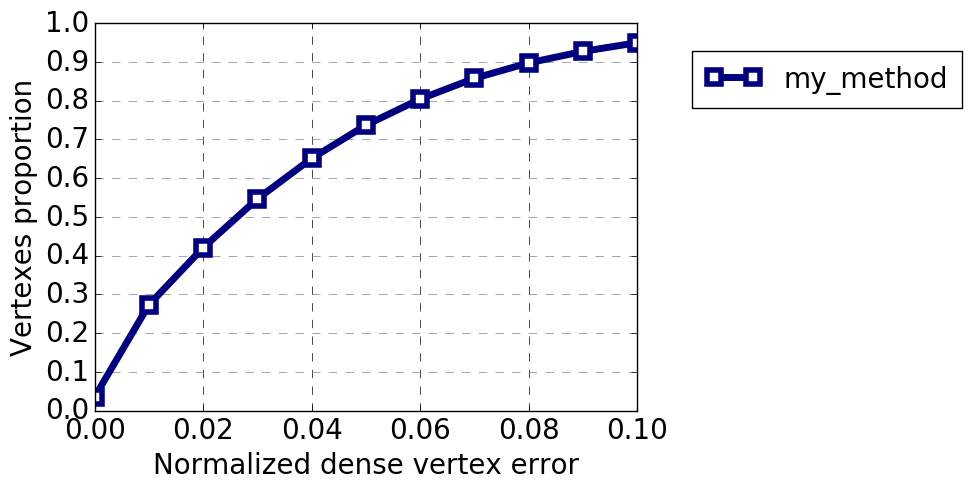

In [3]:
# Define the name of your method. This is just used for visualization
method_name = 'my_method'

table, renderer = plot_ced_3dMDLab({method_name: errors})

In [4]:
# statistics of the distribution of the per vertex errors
table

,mean,std,median,mad,max,auc,fr
my_method,0.0347,0.0329,0.0261,0.0203,0.1957,0.7216,0.0367


# 2. Evaluate on 3dMDLab-synthetic

In [5]:
# Define the path of the reconstructed meshes
path_reconstructions = DATA_PATH / '3dMDLab_synthetic' / 'Reconstructions_dummy'

# Define the path of the ground truth meshes
path_gt = DATA_PATH / '3dMDLab_synthetic' / 'Ground_Truth'

# Define the model template you are using.
# You can choose on the three supported models according to the model
# you have used for your reconstructions:
# - 'LSFM'
# - 'Basel'
# - 'Surrey'
model = 'LSFM'

errors = calculate_errors_3dMDLab(path_reconstructions, path_gt, model)

[====================] 100% (6/6) - done.                                       


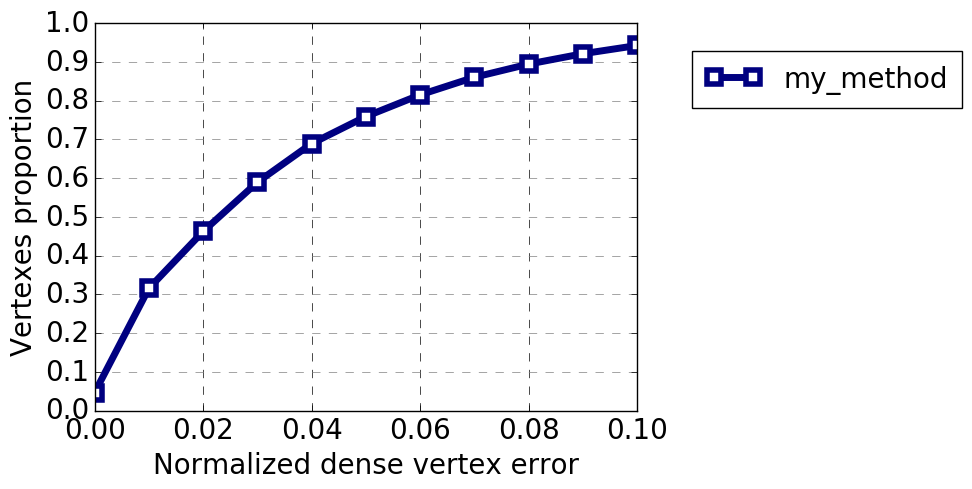

In [6]:
# Define the name of your method. This is just used for visualization
method_name = 'my_method'

table, renderer = plot_ced_3dMDLab({method_name: errors})

In [7]:
# statistics of the distribution of the per vertex errors
table

,mean,std,median,mad,max,auc,fr
my_method,0.0328,0.0342,0.0228,0.0196,0.1957,0.7398,0.0441


# 3. Evaluate on 4DMaja-real

In [8]:
# Define the path of the reconstructed meshes
path_reconstructions = DATA_PATH / '4DMaja_real' / 'Reconstructions_dummy'

# Define the full path of the ground truth mesh
path_gt = DATA_PATH / '4DMaja_real' / 'Ground_Truth' / 'neutral.obj'

# Define the model template you are using.
# You can choose on the three supported models according to the model
# you have used for your reconstructions:
# - 'LSFM'
# - 'Basel'
# - 'Surrey'
model = 'LSFM'

errors = calculate_errors_4DMaja_real(path_reconstructions, path_gt, model)

[====================] 100% (387/387) - done.                                   


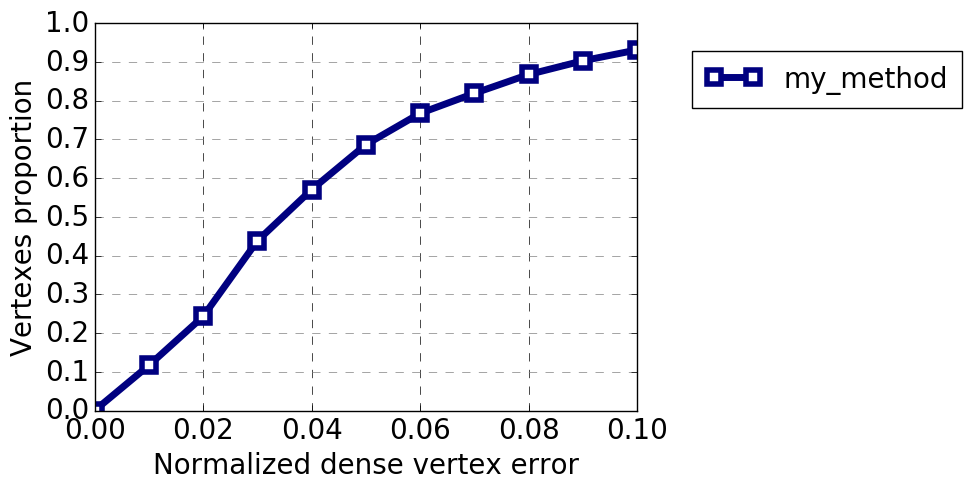

In [9]:
# Define the name of your method. This is just used for visualization
method_name = 'my_method'

table, renderer = plot_ced_4DMaja_real({method_name: errors})

In [10]:
table

,mean,std,median,mad,max,auc,fr
my_method,0.0434,0.034,0.0344,0.0173,0.1786,0.6495,0.0548


# 4. Evaluate on 4DMaja-synthetic

#### Note that
this calculation can take several minutes depending on your machine, because it measures the per vertex errors for each one of the 440 pairs "ground truth mesh - reconstructred mesh". 

For example, it takes about 11 minutes in an Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz. 

In [11]:
# Define the path of the reconstructed meshes
path_reconstructions = DATA_PATH / '4DMaja_synthetic' / 'Reconstructions_dummy'

# Define the path of the ground truth meshes
path_gt = DATA_PATH / '4DMaja_synthetic' / 'Ground_Truth'

# Define the model template you are using.
# You can choose on the three supported models according to the model
# you have used for your reconstructions:
# - 'LSFM'
# - 'Basel'
# - 'Surrey'
model = 'LSFM'

errors = calculate_errors_4DMaja_synthetic(path_reconstructions, path_gt, model)

[====================] 100% (440/440) - done.                                   


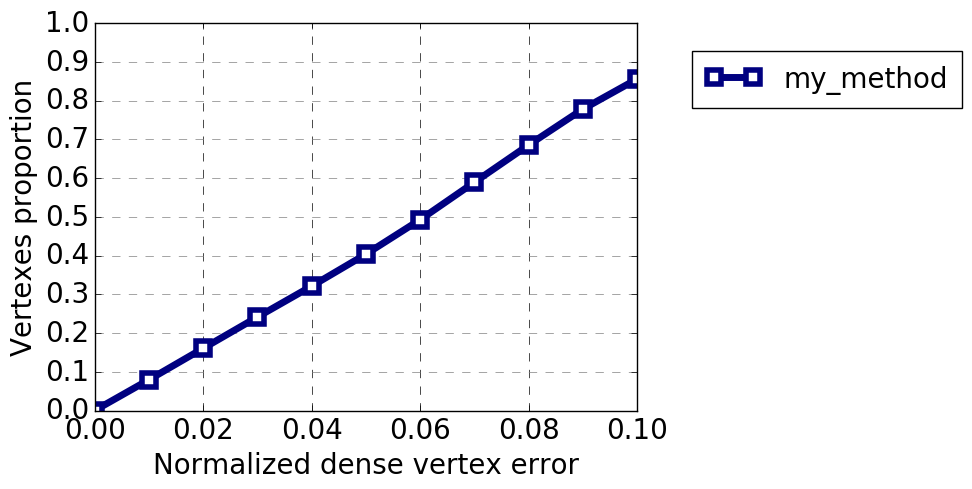

In [12]:
# Define the name of your method. This is just used for visualization
method_name = 'my_method'

table, renderer = plot_ced_4DMaja_synthetic({method_name: errors})

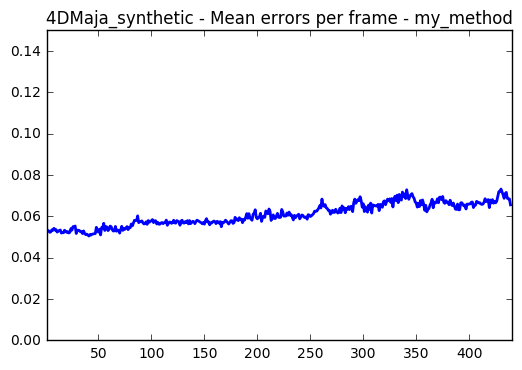

In [13]:
plot_errors_per_frame_4DMaja_synthetic(errors, method_name)